In [22]:
import pandas as pd
import seaborn as sns

# 10 pixels to mm is just a really rough initial estimate!
def normalize_df(df, pixel_to_mm=10):
    x0, y0 = df.iloc[0][['x', 'y']] 
    df['X displacement (mm)'] =  - (df['x'] - x0) / pixel_to_mm
    df['Y displacement (mm)'] = - (df['y'] - y0) / pixel_to_mm
    return df

# experimental_1_df = normalize_df(pd.read_csv('tracked_trajectories/03.21.25_idx0_100x_tracked.csv'))

# sns.scatterplot(experimental_1_df, x='minutes', y='X displacement (mm)', hue='Y displacement (mm)')

<Axes: xlabel='minutes', ylabel='X displacement (mm)'>

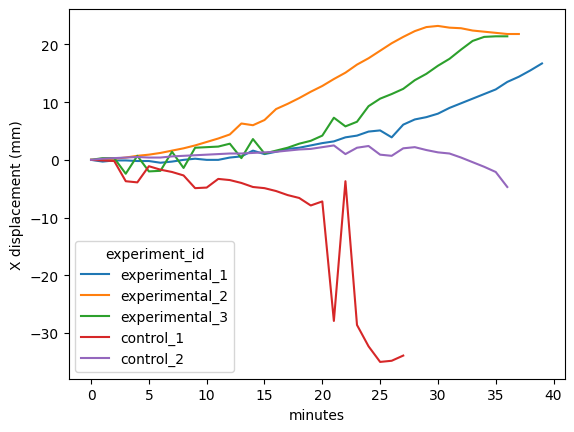

In [23]:
# List of file paths for all datasets
file_paths = {
    'experimental_1': 'tracked_trajectories/03.21.25_idx0_100x_tracked.csv',
    'experimental_2': 'tracked_trajectories/03.21.25_idx1_100x_tracked.csv',
    'experimental_3': 'tracked_trajectories/03.22.25_idx1_100x_tracked.csv',
    'control_1': 'tracked_trajectories/03.25.25_idx0_control_100x_tracked.csv', 
    'control_2': 'tracked_trajectories/03.25.25_idx1_control_100x_tracked.csv', 
}

# Load and normalize each DataFrame, adding an experiment_id column
dfs = []
for name, file in file_paths.items():
    df = normalize_df(pd.read_csv(file))  # Apply your normalize function
    df["experiment_id"] = name  # Label each dataset
    dfs.append(df)

# Concatenate all DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Plot with seaborn (different lines per experiment)
sns.lineplot(data=combined_df, x='minutes', y='X displacement (mm)', hue='experiment_id')


<Axes: xlabel='minutes', ylabel='X displacement (mm)'>

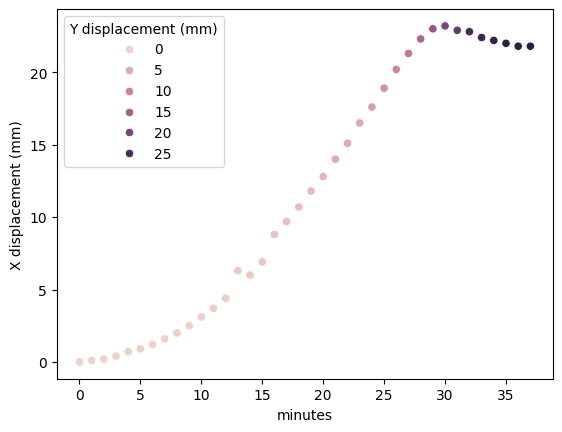

In [18]:
experimental_2_df = normalize_df(pd.read_csv('tracked_trajectories/03.21.25_idx1_100x_tracked.csv'))
sns.scatterplot(experimental_2_df, x='minutes', y='X displacement (mm)', hue='Y displacement (mm)')

<Axes: xlabel='minutes', ylabel='X displacement (mm)'>

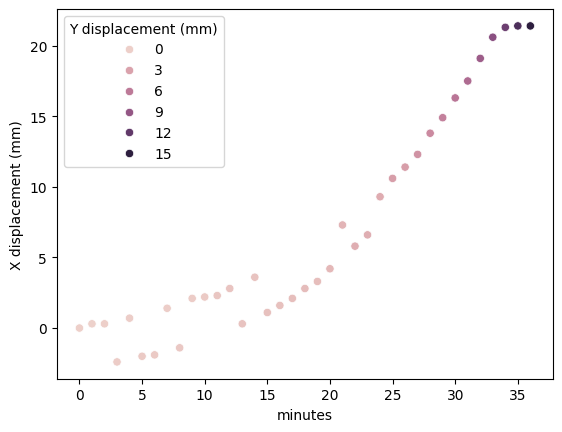

In [19]:
experimental_3_df = normalize_df(pd.read_csv('tracked_trajectories/03.22.25_idx1_100x_tracked.csv'))
sns.scatterplot(experimental_3_df, x='minutes', y='X displacement (mm)', hue='Y displacement (mm)')